# Análisis exploratorio y visualización de datos

María Candela Herrera

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pequeña subrutina para graficar
def miniplot(X,title=""):
    plt.figure(figsize=(3,3))
    plt.axis("off")
    plt.title(title)
    plt.imshow(X,cmap="gray")
    plt.show()
    return

# Lectura del dato

In [3]:
# Ver contenidos del directorio con los datos

!ls ./data  

A_train.npy
A_val.npy
B_train.npy
B_val.npy


In [4]:
# Rocas clase "A" usadas para entrenar y validar:

A    = np.load("./data/A_train.npy")
Aval = np.load("./data/A_val.npy")


# Rocas clase "B" usadas para entrenar y validar:

B    = np.load("./data/B_train.npy")
Bval = np.load("./data/B_val.npy")

# Lista con los nombres asignados a cada conjunto de datos:

names = ["A (entrenamiento)","A (validacion)","B (entrenamiento)","B (validacion)"]

# Análisis exploratorio

Veamos con cuantas imágenes contamos:

In [5]:
print(A.shape)  # Galeria de imágenes de la clase "A"

(300, 28, 28)


Esto quiere decir que hay **300** imágenes de **28x28** píxels de las rocas de clase "A".

Repitiendo esto mismo para el resto de los datos resulta:

In [6]:
for name,X in enumerate([A,Aval,B,Bval]):
    print("Cantidad de datos en",names[name], ":",X.shape)

Cantidad de datos en A (entrenamiento) : (300, 28, 28)
Cantidad de datos en A (validacion) : (130, 28, 28)
Cantidad de datos en B (entrenamiento) : (300, 28, 28)
Cantidad de datos en B (validacion) : (130, 28, 28)


Como podemos observar, hay **300** imágenes de las rocas clase **A** y clase **B** para _entrenar_ y **130** imágenes para _validar_ de cada clase.

Corroboramos si hay puntos con ``NAN`` en la base de datos (utilizando Pandas):

In [13]:
for (name, X) in enumerate([A, Aval, B, Bval]):
    df = pd.isna(A)
    print("Cantidad de datos NAN en",names[name], ":", df.sum())

Cantidad de datos NAN en A (entrenamiento) : 0
Cantidad de datos NAN en A (validacion) : 0
Cantidad de datos NAN en B (entrenamiento) : 0
Cantidad de datos NAN en B (validacion) : 0


Corroboramos  entonces que no hay números espúreos en la base de datos.

# Visualizaciones

Graficamos la cantidad de datos de cada galería de imágenes. Verificamos que tenemos el mismo número de datos para cada categoria:

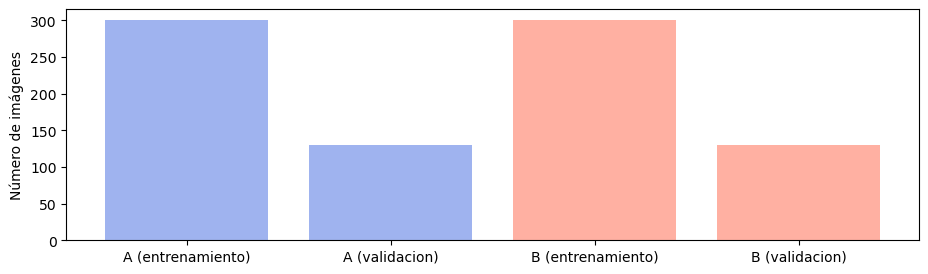

In [8]:
numero_de_imagenes = [A.shape[0],Aval.shape[0],B.shape[0],Bval.shape[0]]  # en el primer "eje" está el número de imágenes

plt.figure(figsize=(11,3))
plt.bar(names[:2],numero_de_imagenes[:2],color="royalblue",alpha=0.5)
plt.bar(names[2:],numero_de_imagenes[2:],color="tomato",alpha=0.5)
plt.ylabel("Número de imágenes")
plt.show()

Grafico un par de imágenes de cada clase para ver si los datos son consistentes. Es decir, si tienen la misma clase de rocas tipificadas como "A" y "B" en los directorios de entrenamiento y validación.

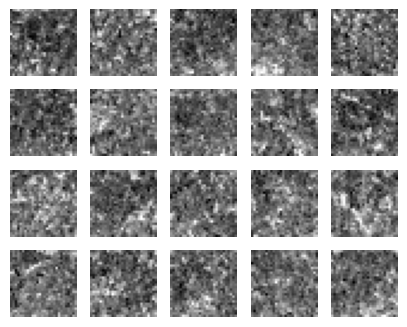

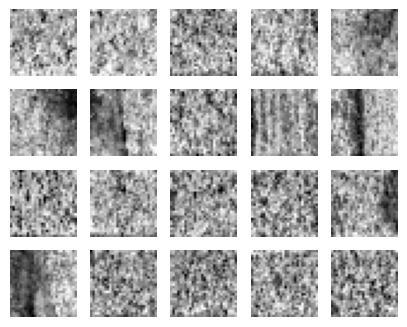

In [9]:
# Rocas de la clase "A" y "B" usadas para entrenar:
for X in [A,B]:
    plt.figure(figsize=(5,4))    
    for k in range(20):
        plt.subplot(4,5,k+1)
        plt.axis("off")    
        plt.imshow(X[k],cmap="gray")
    plt.show()

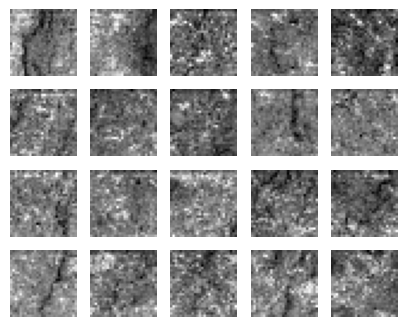

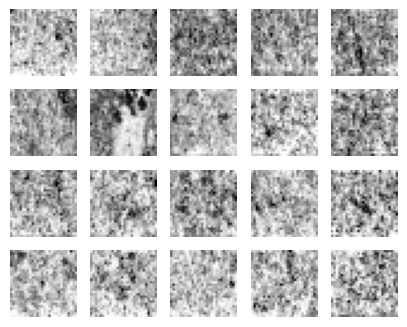

In [10]:
# Rocas de la clase "A" y "B" usadas para validar:
for X in [Aval,Bval]:
    plt.figure(figsize=(5,4))    
    for k in range(20):
        plt.subplot(4,5,k+1)
        plt.axis("off")    
        plt.imshow(X[k],cmap="gray")
    plt.show()

## Detalles

Observamos que algunas imágenes muestran la presencia de fracturas o discontinuidades. Esto puede complicar la validación posterior. Cada imágen con una discontinuidad puede no representar el dato de entrenamiento y el algorimo quizás se confunda al clasificar.

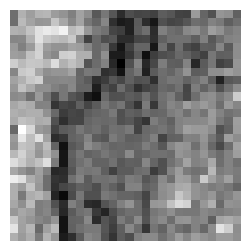

In [11]:
# Rocas de la clase "A" usadas para validar que presenta una discontinuidad (trazo oscuro a la derecha)
for k in [0]:
    miniplot(Aval[k])

También hay ejemplos de imágenes que si bien son de la misma formación geológica, su aspecto local es marcadamente diferente al resto de las imágenes de la misma clase. Veamos un ejemplo:

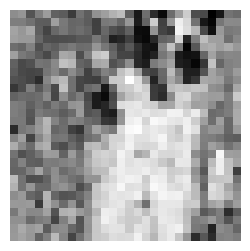

In [12]:
for k in [6]:
    miniplot(Bval[k])

Estos cambios texturales pueden reducir la precisión del clasificador. Claramente, el problema en cuestión reviste una gran complejidad, ya que se tratan de datos reales.